have taken an image of a mountain/hill and am trying to detect sedimentation layers in the image.

In [59]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/_0566_frame0.jpg')
# img= cv2.resize(img, (256, 256))

# Display the image
# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [60]:
img.shape

(2160, 3840, 3)

labeled data with pixel coordinates of bounding boxes that enclose the sedimentation layers.

In [61]:
import pandas as pd
df = pd.read_excel('/content/labelled_data.xlsx')

# Filtering the DataFrame for the specified filename
df_fil = df.loc[df['Filename'] == '_0566_frame0.jpg'][['Filename', 'pixel_coords']]
df_fil

,Filename,pixel_coords
217,_0566_frame0.jpg,"[{""x1"": 31, ""x2"": 2050, ""y1"": 1203, ""y2"": 1718..."
328,_0566_frame0.jpg,"[{""x1"": 403, ""x2"": 1578, ""y1"": 1805, ""y2"": 213..."
377,_0566_frame0.jpg,"[{""x1"": 2567, ""x2"": 2842, ""y1"": 325, ""y2"": 213..."
408,_0566_frame0.jpg,"[{""x1"": 615, ""x2"": 1916, ""y1"": 1589, ""y2"": 199..."
616,_0566_frame0.jpg,"[{""x1"": 2540, ""x2"": 3810, ""y1"": 570, ""y2"": 380..."
735,_0566_frame0.jpg,"[{""x1"": 2174, ""x2"": 3431, ""y1"": 1477, ""y2"": 17..."
861,_0566_frame0.jpg,"[{""x1"": 107, ""x2"": 3796, ""y1"": 1340, ""y2"": 174..."


processed the labeled data to extract the coordinates of the bounding boxes.

'x1': The x-coordinate of the top-left corner of the bounding box.
'y1': The y-coordinate of the top-left corner of the bounding box.
'x2': The x-coordinate of the bottom-right corner of the bounding box.
'y2': The y-coordinate of the bottom-right corner of the bounding box.
To calculate the width and height of each bounding box, the code performs the following operations:

Width: width = x2 - x1
Height: height = y2 - y1

In [62]:
import json
coordinates = []
for row in df_fil.iterrows():
    coords = json.loads(row[1]['pixel_coords'])
    for c in coords:
        coordinates.append((c['x1'], c['y1'], abs(c['x2'] - c['x1']), abs(c['y2'] - c['y1'])))


In [63]:
coordinates

[(31, 1203, 2019, 515),
 (67, 1479, 1901, 555),
 (1390, 2120, 1300, 267),
 (2456, 788, 1386, 199),
 (2275, 1488, 1495, 402),
 (403, 1805, 1175, 326),
 (599, 1594, 1305, 399),
 (802, 1363, 1271, 397),
 (926, 1093, 1211, 380),
 (12, 1203, 543, 169),
 (2567, 325, 275, 112),
 (2880, 221, 667, 81),
 (3708, 72, 455, 32),
 (3218, 121, 436, 38),
 (2556, 466, 73, 3),
 (615, 1589, 1301, 407),
 (664, 1880, 781, 218),
 (2013, 1739, 1155, 388),
 (3779, 919, 1169, 136),
 (2231, 1492, 728, 97),
 (2540, 570, 1270, 190),
 (2576, 380, 1275, 158),
 (2608, 326, 1202, 163),
 (2590, 276, 1234, 180),
 (2585, 218, 1235, 163),
 (2174, 1477, 1257, 276),
 (2106, 1952, 959, 86),
 (1225, 1459, 804, 258),
 (655, 1577, 1203, 397),
 (2536, 731, 1297, 235),
 (107, 1340, 3689, 405),
 (1489, 852, 2327, 68)]

In [64]:
image_height, image_width, _ = img.shape

image_height

2160

For Resizing

width_ratio = 458 / 3840
height_ratio = 458 / 2160

new_x1 = int(old_x1 * width_ratio)

new_y1 = int(old_y1 * height_ratio)

new_width = int(old_width * width_ratio)

new_height = int(old_height * height_ratio)


In [65]:
resize_ratio_x = 458 / image_width
resize_ratio_y = 458 / image_height

# Resizing the coordinates
resized_coordinates = []
for box in coordinates:
    x1 = int(box[0] * resize_ratio_x)
    y1 = int(box[1] * resize_ratio_y)
    width = int(box[2] * resize_ratio_x)
    height = int(box[3] * resize_ratio_y)
    resized_coordinates.append((x1, y1, width, height))

In [66]:
resized_coordinates

[(3, 255, 240, 109),
 (7, 313, 226, 117),
 (165, 449, 155, 56),
 (292, 167, 165, 42),
 (271, 315, 178, 85),
 (48, 382, 140, 69),
 (71, 337, 155, 84),
 (95, 289, 151, 84),
 (110, 231, 144, 80),
 (1, 255, 64, 35),
 (306, 68, 32, 23),
 (343, 46, 79, 17),
 (442, 15, 54, 6),
 (383, 25, 52, 8),
 (304, 98, 8, 0),
 (73, 336, 155, 86),
 (79, 398, 93, 46),
 (240, 368, 137, 82),
 (450, 194, 139, 28),
 (266, 316, 86, 20),
 (302, 120, 151, 40),
 (307, 80, 152, 33),
 (311, 69, 143, 34),
 (308, 58, 147, 38),
 (308, 46, 147, 34),
 (259, 313, 149, 58),
 (251, 413, 114, 18),
 (146, 309, 95, 54),
 (78, 334, 143, 84),
 (302, 154, 154, 49),
 (12, 284, 439, 85),
 (177, 180, 277, 14)]

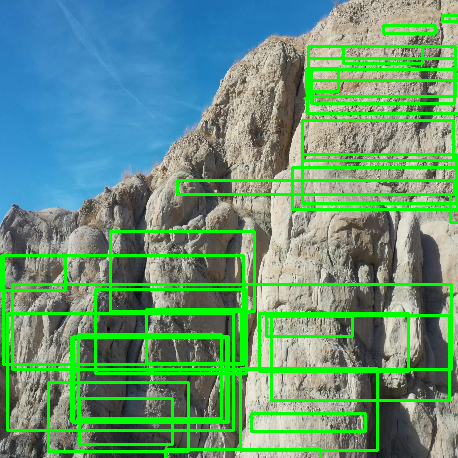

In [67]:
img= cv2.resize(img, (458, 458))

for c in resized_coordinates:
    cv2.rectangle(img, (c[0], c[1]), (c[0] + c[2], c[1] + c[3]), (0, 255, 0), 2)

cv2_imshow(img)

### Ignore this part , juts some ranodm epxloration which was not successful

In [68]:
# import numpy as np
# mask = np.zeros(img.shape[:2], np.uint8)
# for c in coordinates:
#     mask[c[1]:c[1]+c[3], c[0]:c[0]+c[2]] = 255

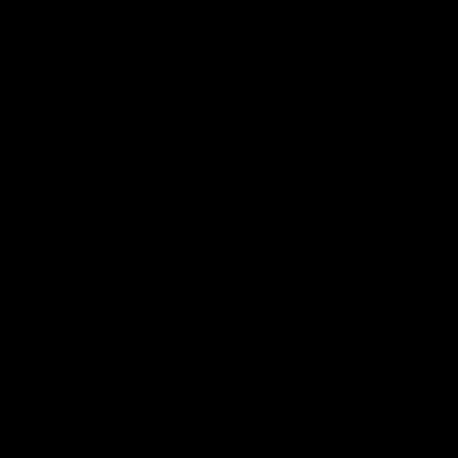

In [ ]:
# masked_img = cv2.bitwise_and(img, img, mask=mask)

# # Display the masked image
# cv2_imshow(masked_img)

### Just checking how the resized coordinates will be saved when ina csv file before I apply in a function 

In [ ]:
# import cv2
# cv2.imwrite('/content/Training/images/test1.jpg', img)

# # # Saving the pixel coordinates in a CSV file
# df_coordinates = pd.DataFrame({'Filename': ['test1.jpg'] * len(coordinates),
#                                'x1': [c[0] for c in coordinates],
#                                'y1': [c[1] for c in coordinates],
#                                'width': [c[2] for c in coordinates],
#                                'height': [c[3] for c in coordinates]})
# df_coordinates.to_csv('/content/Training/annotations/test1.csv', index=False)

In [69]:
import cv2
import json
import os
import pandas as pd

def annotate_image(image_file, excel_file, training_folder):
    img = cv2.imread(image_file)

    # Getting the pixel coordinates from the Excel file
    df = pd.read_excel(excel_file)
    df_fil = df.loc[df['Filename'] == os.path.basename(image_file)][['Filename', 'pixel_coords']]


    coordinates = []
    for row in df_fil.iterrows():
      coords = json.loads(row[1]['pixel_coords'])
      for c in coords:
        coordinates.append((c['x1'], c['y1'], c['x2'] - c['x1'], c['y2'] - c['y1']))

    image_height, image_width, _ = img.shape
    
    resize_ratio_x = 458 / image_width
    resize_ratio_y = 458 / image_height

# Resizing the coordinates
    resized_coordinates = []
    for box in coordinates:
      x1 = int(box[0] * resize_ratio_x)
      y1 = int(box[1] * resize_ratio_y)
      width = int(box[2] * resize_ratio_x)
      height = int(box[3] * resize_ratio_y)
      resized_coordinates.append((x1, y1, width, height))  


    img= cv2.resize(img, (458, 458))

    # for c in resized_coordinates:
    #    cv2.rectangle(img, (c[0], c[1]), (c[0] - c[2], c[1] - c[3]), (0, 255, 0), 2)   


    # Saving the annotated image
    annotated_image_path = os.path.join(training_folder, 'images', 'train' + str(annotate_image.counter) + '.jpg')
    cv2.imwrite(annotated_image_path, img)

    # Saving the pixel coordinates in a CSV file
    annotations = {'Filename': ['train' + str(annotate_image.counter) + '.jpg'] * len(resized_coordinates),
                   'x1': [c[0] for c in resized_coordinates],
                   'y1': [c[1] for c in resized_coordinates],
                   'width': [c[2] for c in resized_coordinates],
                   'height': [c[3] for c in resized_coordinates]}
    annotations_df = pd.DataFrame(annotations)
    annotations_path = os.path.join(training_folder, 'annotations', 'train' + str(annotate_image.counter) + '.csv')
    annotations_df.to_csv(annotations_path, index=False)

    annotate_image.counter += 1


calling the above function to create a set of training images and annotation  csv

In [70]:
annotate_image.counter = 1

labelled_image_folder = '/content/labelled'
excel_file = '/content/labelled_data.xlsx'
training_folder = '/content/training'

# Annotating each image in the labelled image folder and saving the annotated image and CSV in the training folder
for image_file in os.listdir(labelled_image_folder):
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        image_path = os.path.join(labelled_image_folder, image_file)
        annotate_image(image_path, excel_file, training_folder)

loaded the annotated images and corresponding annotations (CSV files) into separate lists.

In [71]:
from PIL import Image
import pandas as pd
import os

# Setting the file paths
images_folder = '/content/training/images'
annotations_folder = '/content/training/annotations'

# Loading the images and annotations
images = []
annotations = []
for file_name in os.listdir(images_folder):
    if file_name.endswith('.jpg'):
        # Loading the image
        image_path = os.path.join(images_folder, file_name)
        image = Image.open(image_path)
        images.append(image)

        # Loading the annotation
        annotation_path = os.path.join(annotations_folder, os.path.splitext(file_name)[0] + '.csv')
        annotation_df = pd.read_csv(annotation_path)
        annotation_dict = annotation_df.to_dict('records')
        annotations.append(annotation_dict)


loaded the annotated images and corresponding annotations (CSV files) into separate lists.

In [72]:
import numpy as np
from PIL import Image


preprocessed_images = []
for image in images:
  
    array_image = np.array(image)
    
 
    preprocessed_images.append(array_image)


### Method 1 uisng simple CNN 

Conv2D and MaxPooling2D layers, followed by several fully connected Dense layers. The output layer has 50 nodes (10 bounding boxes * 5 values per box) and is reshaped to a (10, 5) tensor.

The convolutional layers are used to learn local features in the images, such as edges, textures, and shapes.
As the depth of the network increases, the learned features become more complex

The ReLU activation function is used to introduce non-linearity into the network. This non-linearity allows the model to learn more complex and intricate patterns in the data. For the negative input values, the result is zero, that means the neuron does not get activated

The max pooling layers are used to reduce the spatial dimensions of the feature maps, effectively summarizing and condensing the information in them. 

The flatten layer is used to convert the 2D feature maps into a 1D vector, which can then be processed by the fully connected (dense) layers

The fully connected layers take the high-level features learned by the convolutional layers and use them to make predictions. In this case, they learn to map the features to the bounding box coordinates and class labels

The final output layer has 50 neurons, representing 10 bounding boxes with 5 values each. The sigmoid activation function is used to ensure that the output values are in the range [0, 1]

The reshape layer organizes the output into a structured format (10 bounding boxes, each with 5 values)


In [73]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(458, 458, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10 * 5, activation='sigmoid'))
model.add(Reshape((10, 5)))

model.compile(optimizer='adam', loss='mse')


In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 456, 456, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 228, 228, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 226, 226, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 113, 113, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 111, 111, 128)     73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 55, 55, 128)     

In [ ]:
# annotations

converted the annotations into a numpy array with the shape (number of images, 10, 5), where 10 is the maximum number of bounding boxes per image, and 5 values represent the class label and bounding box coordinates.

In [ ]:
# Converting the annotations to a numpy array
max_boxes_per_image = 10
annotations_array = np.zeros((len(preprocessed_images), 10, 5))
for i, image_annotations in enumerate(annotations):
    for j, box in enumerate(image_annotations):
        if j == 10:
            break
        box_values = [v for k, v in box.items() if k != 'Filename']
        annotations_array[i, j, 0] = 1  # Setting the class label to 1
        annotations_array[i, j, 1:] = box_values  # Setting the bounding box coordinates

In [ ]:
# annotations_array

In [ ]:
# images

In [ ]:
# Training the model
model.fit(np.array(preprocessed_images), annotations_array, epochs=100, batch_size=32)

Epoch 1/100
5/5 [==============================] - 22s 550ms/step - loss: 27847.7793
Epoch 2/100
5/5 [==============================] - 1s 200ms/step - loss: 27834.7812
Epoch 3/100
5/5 [==============================] - 1s 201ms/step - loss: 27831.1055
Epoch 4/100
5/5 [==============================] - 1s 202ms/step - loss: 27831.1016
Epoch 5/100
5/5 [==============================] - 1s 202ms/step - loss: 27831.0918
Epoch 6/100
5/5 [==============================] - 1s 201ms/step - loss: 27831.0898
Epoch 7/100
5/5 [==============================] - 1s 202ms/step - loss: 27831.0938
Epoch 8/100
5/5 [==============================] - 1s 201ms/step - loss: 27831.0918
Epoch 9/100
5/5 [==============================] - 1s 203ms/step - loss: 27831.0898
Epoch 10/100
5/5 [==============================] - 1s 201ms/step - loss: 27831.0898
Epoch 11/100
5/5 [==============================] - 1s 203ms/step - loss: 27831.0898
Epoch 12/100
5/5 [==============================] - 1s 202ms/step - loss:

In [ ]:
import cv2
import numpy as np

image_path = '/content/_0566_frame220.jpg'
imagetest = cv2.imread(image_path)
# imagetest = cv2.resize(imagetest, (256, 256))




In [ ]:
# cv2_imshow(imagetest)

converted the annotations into a numpy array with the shape (number of images, 10, 5), where 10 is the maximum number of bounding boxes per image, and 5 values represent the class label and bounding box coordinates.

In [ ]:
# Preprocessing the image
imagetest = cv2.resize(imagetest, (458, 458))
# imagetest = imagetest.astype('float32') / 255.0

# Predicting the sedimentation layers
predictions = model.predict(np.expand_dims(imagetest, axis=0))

# Postprocessing the predictions
#If the class label (prediction[0]) is greater than or equal to 0.5 (to filter out low-confidence predictions),
#the bounding box coordinates are scaled back to the original image size by multiplying them with the width and height of the image, 
#and then converted to integers.
layer_boxes = []
for prediction in predictions[0]:
    if prediction[0] >= 0.5:
        x1 = int(prediction[1] * imagetest.shape[1])
        y1 = int(prediction[2] * imagetest.shape[0])
        x2 = int((prediction[1] + prediction[3]) * imagetest.shape[1])
        y2 = int((prediction[2] + prediction[4]) * imagetest.shape[0])
        layer_boxes.append((x1, y1, x2, y2))
        
# Visualizing the predictions
image_copy = imagetest.copy()
for box in layer_boxes:
    cv2.rectangle(image_copy, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

cv2.rectangle(img, (c[0], c[1]), (c[0] + c[2], c[1] + c[3]), (0, 255, 0), 2)    




In [ ]:
layer_boxes

[(0, 458, 0, 916),
 (458, 458, 916, 458),
 (458, 458, 916, 916),
 (458, 0, 458, 458)]

We can see the predicted box coordinates are not enough so in next method I will try to increase the model complexity

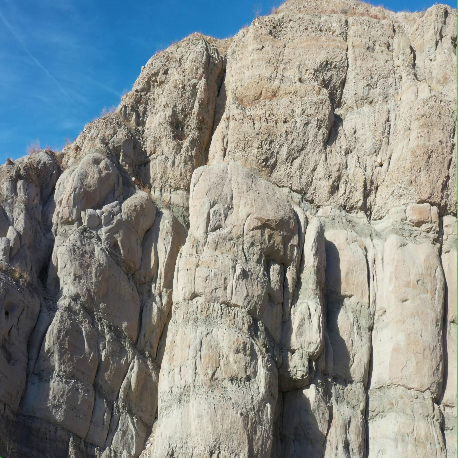

In [ ]:
cv2_imshow(image_copy)

### Method 2 increasing model complexity

he VGG16 model consists of 16 layers, including 13 convolutional layers and 3 fully connected layers.

This model is a custom convolutional neural network (CNN) for object detection, built on top of the VGG16 pre-trained model.

The VGG16 model is loaded with pre-trained ImageNet weights and its top fully connected layers are excluded by setting include_top=False(beacuse it hs 3 full connected layers so reduce complexity they were removed)

The output from the base model is flattened to a 1D tensor.

next series of layers are fully connected layers (Dense) with ReLU activation functions, followed by Dropout layers for regularization to prevent overfitting
(Dropout layers are a regularization technique used in neural networks to prevent overfitting.Dropout layer works by randomly setting a fraction of input units to 0 during training, which helps prevent the model from relying too heavily on any single input feature)

A fully connected layer with 256 * 14 * 14 neurons is added, followed by a Reshape layer to reshape the output to a shape of (14, 14, 256).

The next series of layers are convolutional layers (Conv2D) with ReLU activation functions and 'same' padding to maintain the spatial dimensions, followed by max-pooling layers (MaxPooling2D) to reduce the spatial dimensions.

An output layer with 10 * 5 neurons is added, using the sigmoid activation function.

The output layer is reshaped to a shape of (10, 5), where each row corresponds to a bounding box and its class probability, x, y, width, and height values.

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Reshape
from keras.layers import Conv2D, MaxPooling2D


# Loading the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(458, 458, 3))

# Adding a new layer to reshape the VGG16 output to a compatible shape
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256 * 14 * 14, activation='relu')(x)
x = Reshape((14, 14, 256))(x)

# Adding additional convolutional layers
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Adding the output layer
x = Flatten()(x)
predictions = Dense(10 * 5, activation='sigmoid')(x)
predictions = Reshape((10, 5))(predictions)

# Creating the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compilling the model
model.compile(optimizer='adam', loss='mse')


58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 458, 458, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 458, 458, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 458, 458, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 229, 229, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 229, 229, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 229, 229, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 114, 114, 128)     0     

In [ ]:
# Converting the annotations to a numpy array
max_boxes_per_image = 10
annotations_array = np.zeros((len(preprocessed_images), 10, 5))
for i, image_annotations in enumerate(annotations):
    for j, box in enumerate(image_annotations):
        if j == 10:
            break
        box_values = [v for k, v in box.items() if k != 'Filename']
        annotations_array[i, j, 0] = 1  # Setting the class label to 1
        annotations_array[i, j, 1:] = box_values  # Setting the bounding box coordinates

In [1]:
model.fit(np.array(preprocessed_images), annotations_array, epochs=100, batch_size=32)

In [ ]:
# Preprocessing the image
imagetest = cv2.resize(imagetest, (458, 458))

# Predicting the sedimentation layers
predictions = model.predict(np.expand_dims(imagetest, axis=0))

# Postprocessing the predictions
layer_boxes = []
for prediction in predictions[0]:
    if prediction[0] >= 0.5:
        x1 = int(prediction[1] * imagetest.shape[1])
        y1 = int(prediction[2] * imagetest.shape[0])
        x2 = int((prediction[1] + prediction[3]) * imagetest.shape[1])
        y2 = int((prediction[2] + prediction[4]) * imagetest.shape[0])
        layer_boxes.append((x1, y1, x2, y2))
        
# Visualizging the predictions
image_copy = imagetest.copy()
for box in layer_boxes:
    cv2.rectangle(image_copy, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)


In [ ]:
layer_boxes

[(458, 458, 916, 458),
 (458, 458, 916, 458),
 (458, 458, 916, 458),
 (458, 458, 916, 458),
 (458, 458, 916, 458),
 (458, 458, 916, 916),
 (458, 458, 916, 916)]

We can see that even after increasing the complexity the predicted box coordinates are not good enough. So in next model we will a bter CNN called YOLO V5

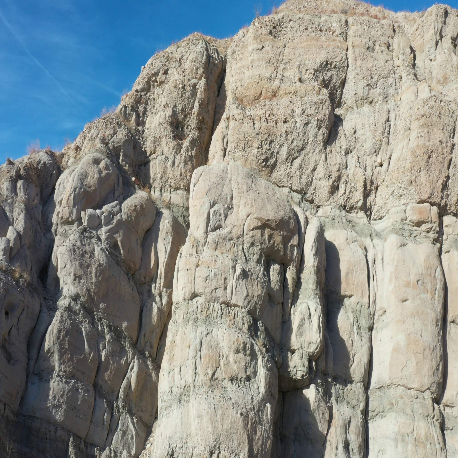

In [ ]:
cv2_imshow(image_copy)

Method 3 using YOLO

YOLO (You Only Look Once) is a state-of-the-art object detection model that can detect objects within an image and label them with bounding boxes in real-time.

The YOLOv5 Tiny model consists of a backbone network called CSPDarknet53

CSPDarknet53 backbone network has fewer layers compared to the larger YOLOv5 models, making it faster and more efficient

It is designed to run efficiently on devices with limited computational resources, such as mobile devices and embedded systems.

The input image is first resized to a fixed size and then passed through the CSPDarknet53 backbone network to extract features. The feature map is then processed by a series of convolutional layers to generate predictions for object bounding boxes and their corresponding class probabilities

In [35]:
import os
import pandas as pd

# Setting the path to the directory containing the CSV files
csv_dir = '/content/training/annotations'

# Setting the path to the directory containing the images
image_dir = '/content/training/images'

# Setting the output directory for the YOLO formatted labels
output_dir = '/content/yolov5_tiny_format'

# Looping through all CSV files in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.endswith('.csv'):
        
        # Loading the CSV file into a pandas dataframe
        csv_path = os.path.join(csv_dir, csv_file)
        df = pd.read_csv(csv_path)
        
        # Looping through each row of the dataframe and convert the coordinates to YOLO format
        yolo_labels = []
        for i, row in df.iterrows():
            filename = row['Filename']
            x1 = row['x1']
            y1 = row['y1']
            width = row['width']
            height = row['height']

            # Calculating the x, y, w, and h values for the YOLO format
            x = (x1 + (width / 2)) / 458
            y = (y1 + (height / 2)) / 458
            w = abs(width) / 458
            h = abs(height) / 458
            
            # Appending the YOLO formatted label to the list
            label_str = f'0 {x:.6f} {y:.6f} {w:.6f} {h:.6f}'
            yolo_labels.append(label_str)
        
        # Saving the YOLO formatted labels to a text file
        label_path = os.path.join(output_dir, os.path.splitext(csv_file)[0] + '.txt')
        with open(label_path, 'w') as f:
            for label in yolo_labels:
                f.write(label + '\n')


YOLO format represents bounding boxes using the center coordinates (x, y) and the relative width and height (w, h), all normalized to the range of 0 to 1.

x = (x1 + (width / 2)) / 458
y = (y1 + (height / 2)) / 458
w = abs(width) / 458
h = abs(height) / 458

calculate the x-coordinate of the center of the bounding box by adding half of the width to x1, which is the left coordinate of the bounding box. It then divides the result by the image width (458) to normalize the value between 0 and 1.

calculates the y-coordinate of the center of the bounding box by adding half of the height to y1, which is the top coordinate of the bounding box. It then divides the result by the image height (458) to normalize the value between 0 and 1

calculate the width of the bounding box relative to the image width by dividing the width by the image width (458). This normalizes the value between 0 and 1.

calculate the height of the bounding box relative to the image height by dividing the height by the image height (458). This normalizes the value between 0 and 1.

In [36]:
!git clone https://github.com/ultralytics/yolov5.git


Cloning into 'yolov5'...
remote: Enumerating objects: 15553, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 15553 (delta 65), reused 103 (delta 49), pack-reused 15393
Receiving objects: 100% (15553/15553), 14.59 MiB | 27.07 MiB/s, done.
Resolving deltas: 100% (10589/10589), done.


In [37]:
%cd yolov5
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00


In [38]:
import shutil

source = 'models/yolov5s.yaml'
destination = 'models/yolov5_tiny_custom.yaml'

shutil.copyfile(source, destination)


'models/yolov5_tiny_custom.yaml'

In [39]:
import os
import shutil

source_folder = '/content/yolov5_tiny_format'
destination_folder = '/content/training/labels'

if os.path.exists(destination_folder):
    shutil.rmtree(destination_folder)

shutil.move(source_folder, destination_folder)


'/content/training/labels'

In [48]:
!python train.py --img 458 --batch 16 --epochs 300 --data data.yaml --cfg models/yolov5_tiny_custom.yaml --weights '' --name yolov


train: weights=, cfg=models/yolov5_tiny_custom.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=458, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, o

In [49]:
!python /content/yolov5/val.py --weights /content/yolov5/runs/train/yolov/weights/best.pt --data data.yaml --img 640 --batch-size 16 --iou-thres 0.4


val: data=data.yaml, weights=['/content/yolov5/runs/train/yolov/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.4, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5_tiny_custom summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/training/labels.cache... 134 images, 0 backgrounds, 4 corrupt: 100% 134/134 [00:00<?, ?it/s]
train: WARNING ⚠️ /content/training/images/train103.jpg: 5 duplicate labels removed
train: WARNING ⚠️ /content/training/images/train24.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0786]
train: WARNING ⚠️ /content/train

As we compare thr pred lanbels we see the it is predicting decently even when the training images don't contains bounding boxes on them

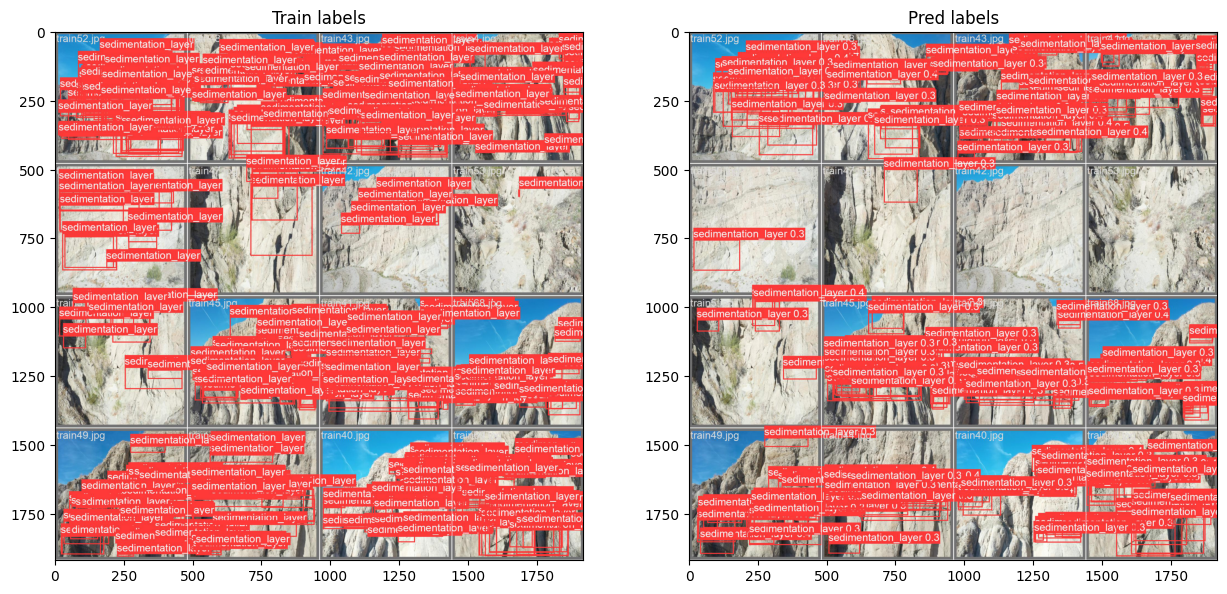

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img_path1 = '/content/yolov5/runs/val/exp/val_batch1_labels.jpg'

img_path2 = '/content/yolov5/runs/val/exp/val_batch1_pred.jpg'


img1 = mpimg.imread(img_path1)
img2 = mpimg.imread(img_path2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

ax1.imshow(img1)
ax1.set_title('Train labels')

ax2.imshow(img2)
ax2.set_title('Pred labels')

plt.show()


### Discussion of results

##### F1-Confidence curve
When a classifier makes a prediction, it assigns a probability score to each class label, representing the likelihood of the sample belonging to that class. The confidence threshold is a threshold value used to set a minimum probability score for a prediction to be considered positive


The F1 score is a metric that combines precision and recall, two key measures of a binary classifier's performance.It is a measure of a classifier's accuracy

formula used for F1-score in this case is:

2 x (precion x recall)/(precison +recall)

### **The idea is to provide a single metric that weights the two ratios (precision and recall) in a balanced way, requiring both to have a higher value for the F1-score value to rise**.


The F1 confidence graph allows analysts to visualize how the performance of the classifier changes as the confidence threshold is varied. At low confidence thresholds, the classifier may have high recall but low precision, which means it may identify many positive cases but also many false positives. At high confidence thresholds, the classifier may have high precision but low recall
, which means it may miss many positive cases but have few false positives.

### **As we can see from the graph , the model's performance is average (as the f1 score is high when the confidence thershold is close to middle) but not as good as the model when it was taking training images with the bounding boxes on them.**

### **Aother thing we can notice, the max f1 score is close to 0.4 which is not very high for a binary classification problem.This indicates that the model is not as good the model when it was taking the training images with bounding boxes**

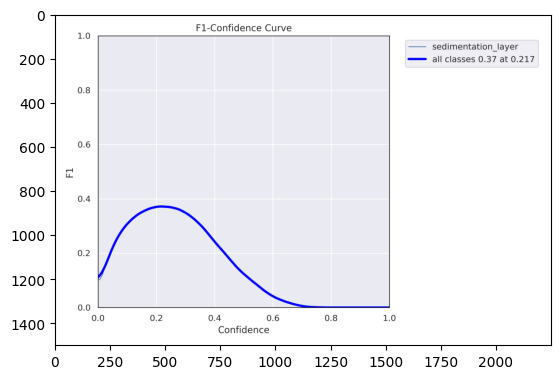

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread("/content/yolov5/runs/val/exp/F1_curve.png"))

#### Precision-Confidence Curve
Precision is actullay how many of the positively prediccted values are actually positive

(true positives)/ (true positives + false positives)

The precision-confidence curve helps to visualize the trade-off between precision and the confidence threshold.

As the confidence threshold increases, the precision typically increases. This is because, at higher confidence levels, the model becomes more selective and is less likely to make false positive predictions


### **good precision-confidence curve typically has high precision values for high confidence thresholds, indicating that the algorithm is able to accurately detect objects with a high degree of certainty**

### **Here for high confidence value the precsion is aslo high, which indicates the model is performing decently but again not as good as the previous model which was taking training images with bounding boxes on them.**

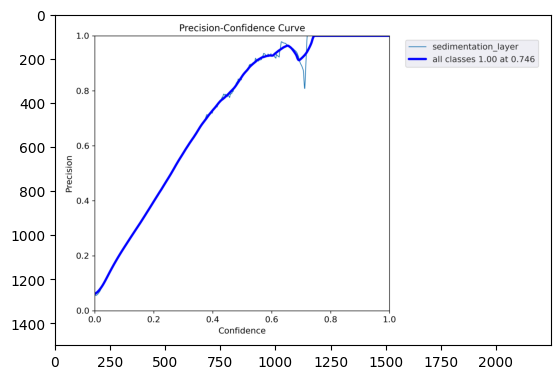

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread("/content/yolov5/runs/val/exp/P_curve.png"))

#### Recall-Confidence Curve

Recall is a measure of how many of the positive cases the classifier correctly predicted

True Positive / True positive + Flase Negatives

The recall-confidence curve helps to visualize the trade-off between recall and the confidence threshold

### **As the confidence threshold increases, the recall typically decreases. This is because, at higher confidence levels, the model may miss some true positive detections**

### **Here we can see as the confidence threshold is increasing the recall is decreasing, which indicates the model is peroforming decently but again not as good as the previous model which was taking training images with bounding boxes on them**

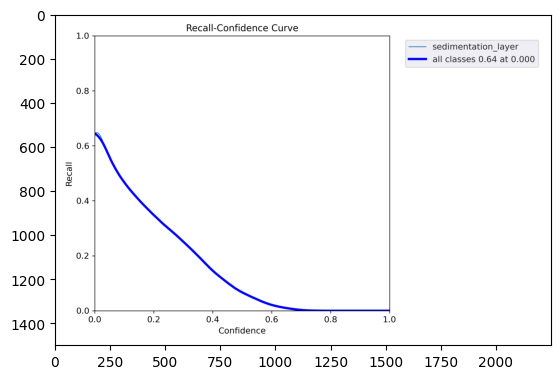

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread("//content/yolov5/runs/val/exp/R_curve.png"))